This is a small analysis on results from Campeonato Brasileiro (brazilian championship of soccer) from 2016 to 2020.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
br16 = pd.read_csv('data/champ-br-2016-matches.csv')
br17 = pd.read_csv('data/champ-br-2017-matches.csv')
br18 = pd.read_csv('data/champ-br-2018-matches.csv')
br19 = pd.read_csv('data/champ-br-2019-matches.csv')
br20 = pd.read_csv('data/champ-br-2020-matches.csv')

br16['year'] = 2016
br17['year'] = 2017
br18['year'] = 2018
br19['year'] = 2019
br20['year'] = 2020

# I could use br['year'] = br['date'].dt.strftime("%Y").
# This would result in the same for 2016, 2017, 2018 and 2019,
# but some matches from 2020's championship didn't happen that year, but in 2021

br = pd.concat([br16, br17, br18, br19, br20]).reset_index(drop=True)
br.head()

,round,date,home_team,home_score,away_score,away_team,year
0,1,2016-05-14,Flamengo,1,0,Sport Recife,2016
1,1,2016-05-14,Palmeiras,4,0,Athletico-PR,2016
2,1,2016-05-14,Atl. Mineiro,1,0,Santos,2016
3,1,2016-05-14,Coritiba,1,0,Cruzeiro EC,2016
4,1,2016-05-15,Botafogo,0,1,São Paulo,2016


There are 380 matches per season during all the championship, with 5 seasons we should have 1900 matches, but, as we can see below, the dataset has 1899 matches, it because, after the Chapecoense tragedy, Chapecoense X Atl. Mineiro didn't happen.

In [4]:
br.shape

(1899, 7)

Visualizing the distribution of quantity of goals per team (playing at home or away) on a match.

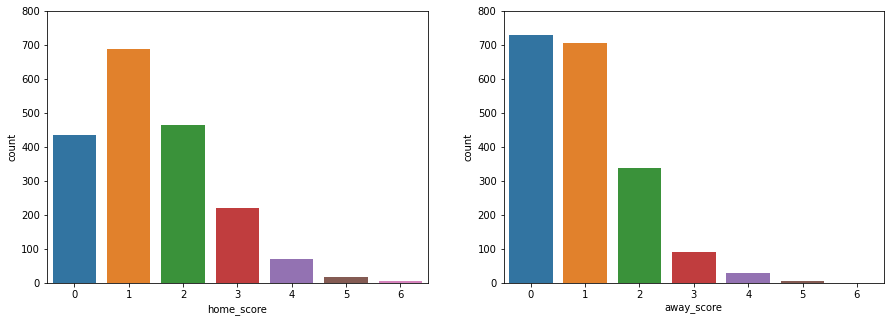

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.countplot(data=br, x='home_score', ax=ax[0]);
sns.countplot(data=br, x='away_score', ax=ax[1]);

ax[0].set_ylim([0, 800])
ax[1].set_ylim([0, 800]);

We see that the probability of a team don't score is significantly higher between those that played away, and it is even what most happen. And, similarly, the teams that most of time scores 2 or more goals are those that play at home. And, finally, score just 1 goal happened approximately in the same amount of matches for both teams.

In [6]:
# Creating a scoreboard column
br['scoreboard'] = None

for i, row in br.iterrows():
    br.at[i, 'scoreboard'] = f"{row['home_score']} - {row['away_score']}"
    
br.head()

,round,date,home_team,home_score,away_score,away_team,year,scoreboard
0,1,2016-05-14,Flamengo,1,0,Sport Recife,2016,1 - 0
1,1,2016-05-14,Palmeiras,4,0,Athletico-PR,2016,4 - 0
2,1,2016-05-14,Atl. Mineiro,1,0,Santos,2016,1 - 0
3,1,2016-05-14,Coritiba,1,0,Cruzeiro EC,2016,1 - 0
4,1,2016-05-15,Botafogo,0,1,São Paulo,2016,0 - 1


In [7]:
freq = br[['scoreboard']].value_counts(normalize=True)*100
print(f'There were {freq.shape[0]} different scoreboards.')
freq.head(10)

There were 36 different scoreboards.


scoreboard
1 - 0         14.955240
1 - 1         13.112164
2 - 1          9.636651
2 - 0          9.110058
0 - 1          8.688784
0 - 0          8.583465
1 - 2          6.213797
2 - 2          4.476040
3 - 0          4.002106
3 - 1          4.002106
dtype: float64

Along all the 5 seasons there were 36 different scoreboards, and looking at the top 10 we can confirm that for those that played away don't score was more common.

Now thinking just about result, from here we already can see that those that play at home has the high probability of end the match with a win.

In [8]:
# Creating a column to label the result of the match
br['result'] = None

for i, row in br.iterrows():
    if row['home_score'] == row['away_score']:
        br.at[i, 'result'] = 'draw'
    elif row['home_score'] > row['away_score']:
        br.at[i, 'result'] = 'home_win'
    elif row['home_score'] < row['away_score']:
        br.at[i, 'result'] = 'away_win'
        
br.head()

,round,date,home_team,home_score,away_score,away_team,year,scoreboard,result
0,1,2016-05-14,Flamengo,1,0,Sport Recife,2016,1 - 0,home_win
1,1,2016-05-14,Palmeiras,4,0,Athletico-PR,2016,4 - 0,home_win
2,1,2016-05-14,Atl. Mineiro,1,0,Santos,2016,1 - 0,home_win
3,1,2016-05-14,Coritiba,1,0,Cruzeiro EC,2016,1 - 0,home_win
4,1,2016-05-15,Botafogo,0,1,São Paulo,2016,0 - 1,away_win


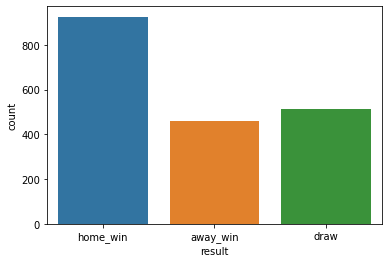

In [9]:
sns.countplot(data=br, x='result');

The most interesting to me is that the draws are more common that away wins and that, as we can see below, home win happened the double of times than away win, 48.8% versus 24.2%.

In [10]:
br[['result']].value_counts(normalize=True)

result  
home_win    0.487625
draw        0.270142
away_win    0.242233
dtype: float64

However, on Campeonato Brasileiro 2020, the crowd was not long able to support teams on stadiums. But did it impact on matches results?

In [11]:
results_by_year = pd.crosstab(br['year'], br['result'], normalize='index')
results_by_year

result,away_win,draw,home_win
year,,,
2016,0.218997,0.248021,0.532982
2017,0.289474,0.271053,0.439474
2018,0.178947,0.289474,0.531579
2019,0.257895,0.257895,0.484211
2020,0.265789,0.284211,0.450000


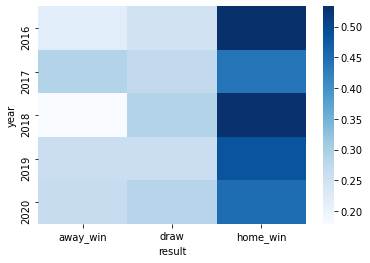

In [12]:
# Easier to compare values visually
sns.heatmap(results_by_year, cmap='Blues');

Indeed, looking at 2018 and 2019, 2020's results were less positive to those that played at home. However, when we focus on 2017, we realize that 2020 was not the worse season to home teams.

Another interesting thing is that in 2018, away wins happened less than 20% of the times.

As conclusion, based on these 5 years, we can say that, definitely, play at home influences result. And that 2020, the first covid-19 year, didn't have an abnormal impact on results.